# Titanic Survival EDA

This project highlights the exploratory data analysis (EDA) of survival using the Titanic dataset from [Kaggle](https://www.kaggle.com/c/titanic).

### Project Plan:

* Understand nature of data using .info() .describe()
* Histograms and boxplots (*not applicable to categoricals*)
* Value counts -> for categorical variables
* Missing data -> remove or impute?
* Correlation between metrics -> model building, relationship of variables
* Explore interesting themes:
    * Wealthy survive?
    * By location in ship
    * Age scatterplot with ticket price
    * Young and wealthy variable?
    * Total spent?

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# import OS (for jupyter notebook)

import os
os.chdir(r"/Users/jolan/Documents/Python Scripts/chdir")

## 2. Import and read data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ss = pd.read_csv('gender_submission.csv')

# Check the dataset

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.info()
print('-'*40)
test.info()
print('-'*40)
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
print('Train: ', train.shape) 
print('Test: ', test.shape)
print('SS: ', ss.shape)

Train:  (891, 12)
Test:  (418, 11)
SS:  (418, 2)


Here we can see that several variables have dtype=object and some are int64 type.

# Descriptive Statistics

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
ss.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


# Exploratory Data Analysis


Check for null values first

In [10]:
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

# Visualize Missing Data

<AxesSubplot:>

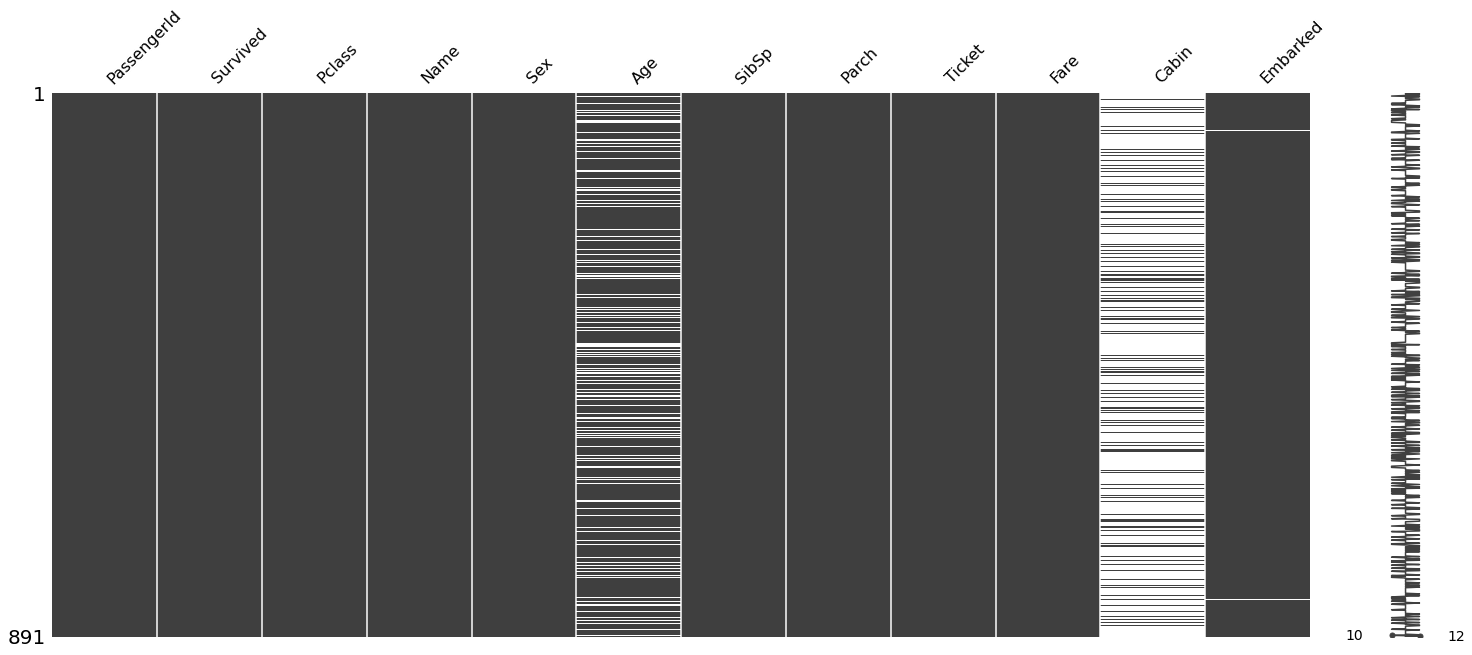

In [12]:
missingno.matrix(train)

<AxesSubplot:>

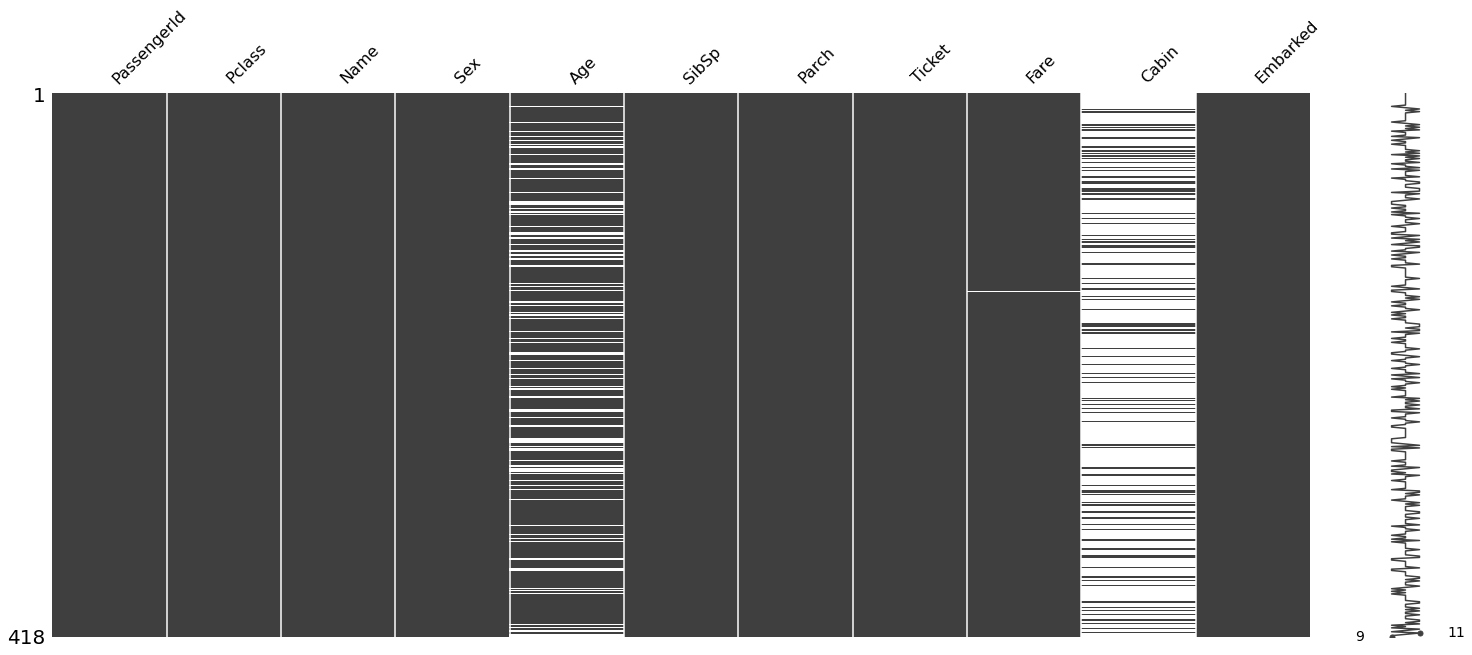

In [13]:
missingno.matrix(test)

In [14]:
#Gender vs. Survival
#Get numerical data

train["Sex"].value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

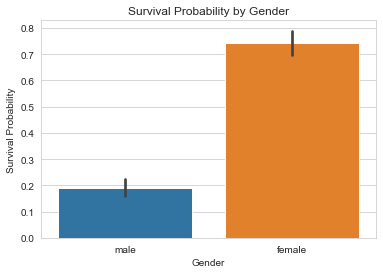

In [16]:
sns.set_style("whitegrid")
sns.barplot(x="Sex", y="Survived", data=train)
plt.xlabel("Gender")
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Gender")

In [17]:
train["Pclass"].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [18]:
train[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

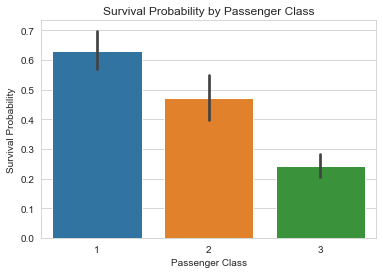

In [19]:
sns.set_style("whitegrid")
sns.barplot(x="Pclass", y="Survived", data=train)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger Class")

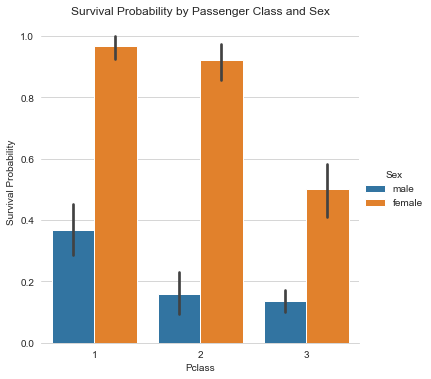

In [20]:
g=sns.catplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel("Survival Probability")
plt.title("Survival Probability by Passenger Class and Sex")
plt.savefig("SurvProbPClassGen.jpg",bbox_inches='tight', dpi=200)

In [21]:
train["Embarked"].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [22]:
train[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

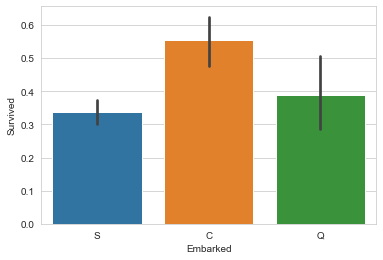

In [23]:
sns.barplot(x="Embarked", y="Survived", data=train)

Survival is highest in C and lowest in S. Why? Majority of the passengers embarked in S. Could it be that majority of the passengers who embarked from C are Class 1 ticket holders? and majority of the passengers embarked from S are class 3 passengers? Let's check this hypothesis using factor plot.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


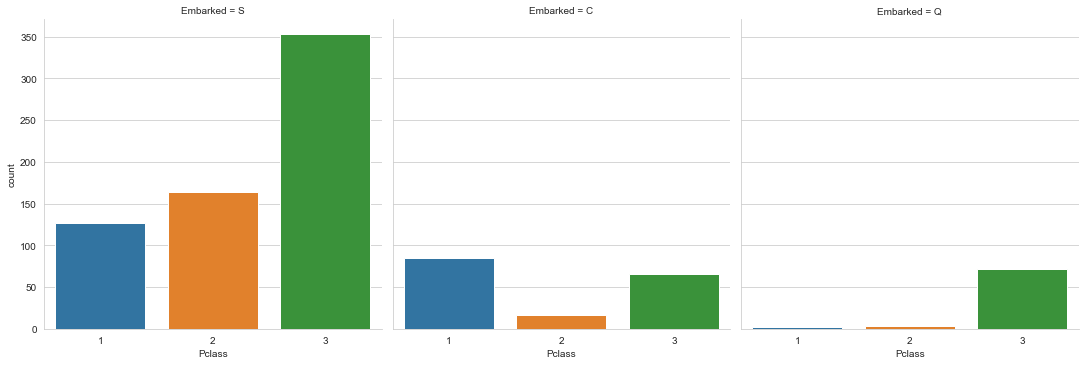

In [24]:
sns.factorplot('Pclass', col='Embarked', data=train, kind='count')

In [25]:
train.groupby(["Embarked", "Pclass"]).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
dtype: int64

The factorplot and size values confirm our hypothesis that in embarkation "S", most passengers had class 3 tickets. While those who embarked in "C", the highest number of passengers were class 1.

Now let's check the survival probability using the three categorical values (Sex, Pclass, Embarked)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


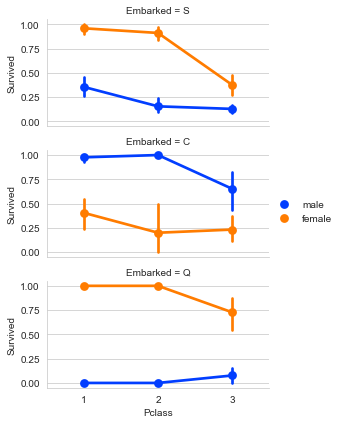

In [26]:
grid = sns.FacetGrid(train, row='Embarked', size=2, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='bright')
grid.add_legend()

Insights:

* Embarkation S and Q: High survival of female vs. male
* Embarkation C: Male survival is higher than female






In [27]:
df = train[train["Embarked"].str.contains("C", na = False)]
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

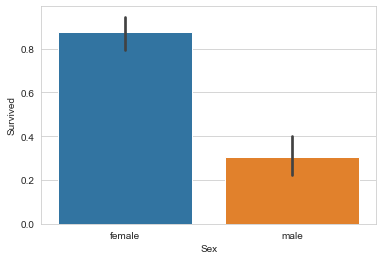

In [28]:
sns.barplot(x="Sex", y="Survived", data = df)

Insights:

* Embarked S: 
    * Female survival is higher than Male for all Pclass
    * Class 1 is highest survival for Female and 

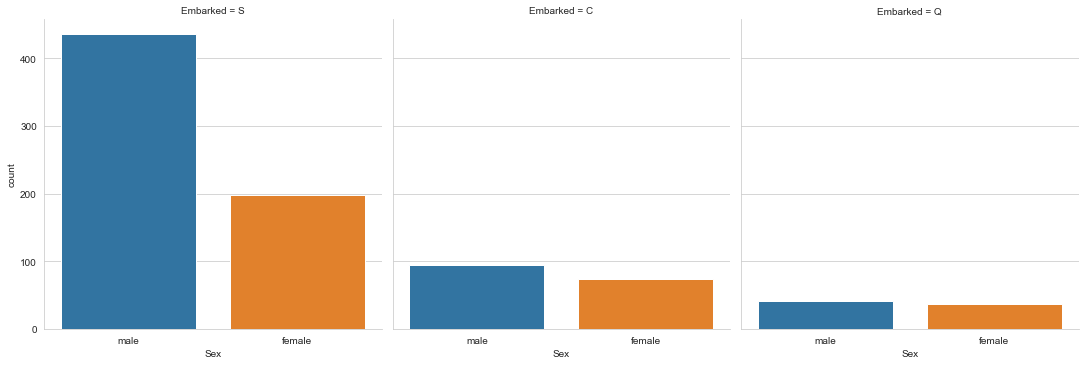

In [48]:
sns.catplot(x='Sex', col='Embarked', data=train, kind='count')

In [30]:
train.groupby(["Embarked", "Sex"]).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    203
          male      441
dtype: int64

In [31]:
# Determine Outliers

def detect_outliers(df, n, features):
    
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

""""
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
"""

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


'"\n    This function will loop through a list of features and detect outliers in each one of those features. In each\n    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds\n    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the \n    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next\n    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier \n    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    \n'

In [32]:
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [33]:
# Drop outliers and reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis = 0).reset_index(drop = True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


# Generating Correlation Heatmap for Numerical Variables

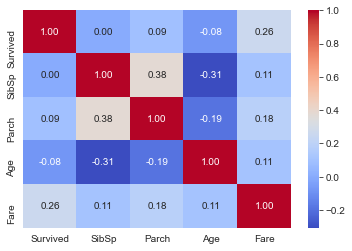

In [34]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.savefig("CorrHeatmap.jpg", dpi=200)

* Analyzing heatmaps can be done vertically or horizontally
* Diagonal (feature correlation with itself = 1)

* Observation: Fare seems to be the only feature that has a substantial correlation with survival 
* Hypothesis: Higher fare = Higher survival??

In [35]:
# Value counts of SibSp 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [36]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

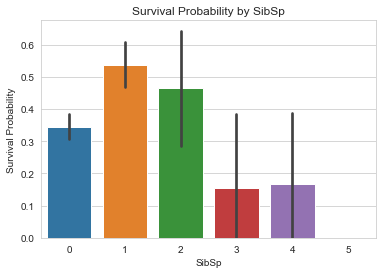

In [37]:
sns.barplot(x = 'SibSp', y = 'Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

Top 3 survival rates comes from those with 1 SibSp, 2 SibSp, and those who are alone.

Those with >= 3 SibSp has low survival index

## Parch variable

In [38]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     70
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.542857
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

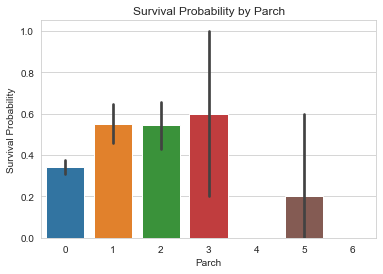

In [40]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

The results indicate higher survival for those with 1 to 3 Parch(Parents / Children). Plausible since the women with children were prioritized during the evacuation.

## Numerical variable: Age

In [41]:
# Null values in Age column 

train['Age'].isnull().sum()

# value counts is not appropriate bec age ranges from 0 to 80 compared to SibSp where we only have 6 categories

170

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Age Distribution')

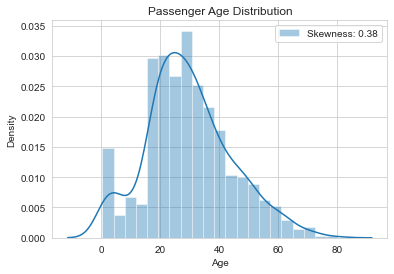

In [42]:
# Passenger age distribution

sns.distplot(train['Age'], kde=True, kde_kws=dict(cut=3), label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')


Positively skewed , most likely this means the outliers of the distribution curve are further out towards the right
and closer to the mean on the left. 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


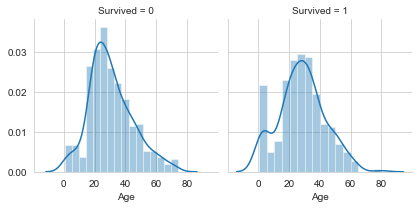

In [43]:
# Age distribution by survival

g = sns.FacetGrid(train, col = 'Survived')
g.map(sns.distplot, 'Age')

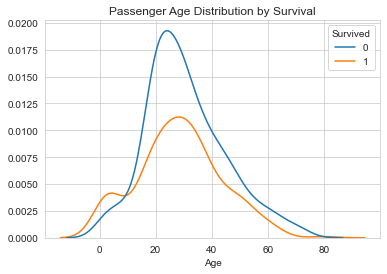

In [44]:
j1 = sns.kdeplot(data=train, x="Age", hue = 'Survived')
plt.xlabel('Age')
j1.set(ylabel=None)
plt.title('Passenger Age Distribution by Survival')
plt.savefig("AgeDistSurv.jpeg", bbox_inches='tight', dpi=200)

Passengers of younger age are likely to survived. Same with women.
Peak around 0-5 years old.

# Fare

In [45]:
#Null values of Fare column
train['Fare'].isnull().sum()

0

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Fare Distribution')

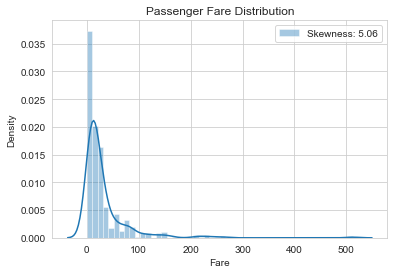

In [46]:
#Passenger Fare dist

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

Highly skewed to the right. Presence of outliers.